In [1]:
using Distributed
addprocs(44);

### Fitting a choice model.

First you have to include the necessary package

In [2]:
using PulseInputDDM, Flatten

### Geneerate some data
Blah blah blah

In [3]:
θ_syn = θchoice(θz=θz(σ2_i = 1., B = 13., λ = -0.5, σ2_a = 10., σ2_s = 1.0,
    ϕ = 0.4, τ_ϕ = 0.02), bias=0.1, lapse=0.1);

In [4]:
_, data = synthetic_data(;θ=θ_syn, ntrials=20_000, rng=1, dt=1e-2);

In [5]:
n = 53

53

In [6]:
model = choiceDDM(θ=θ_syn, data=data, n=n);

In [ ]:
loglikelihood(model)

-7480.922581827128

In [8]:
#x0 = collect(Flatten.flatten(θ_syn));
x0 = vcat([0.1, 15., -0.1, 20., 0.5, 0.2, 0.008], [0.,0.01]) #random initial state

9-element Vector{Float64}:
  0.1
 15.0
 -0.1
 20.0
  0.5
  0.2
  0.008
  0.0
  0.01

In [9]:
θ = Flatten.reconstruct(θchoice(), x0)

θchoice{θz{Float64}, Float64}
  θz: θz{Float64}
  bias: Float64 0.0
  lapse: Float64 0.01


In [10]:
model = choiceDDM(θ=θ, data=data, n=n);

In [6]:
loglikelihood(θ_syn, data, n)

-7696.220939998316

In [11]:
loglikelihood(model)

-8783.722335396948

In [12]:
options = choiceoptions()

choiceoptions
  fit: Array{Bool}((9,)) Bool[1, 1, 1, 1, 1, 1, 1, 1, 1]
  lb: Array{Float64}((9,)) [0.0, 4.0, -5.0, 0.0, 0.0, 0.01, 0.005, -5.0, 0.0]
  ub: Array{Float64}((9,)) [30.0, 30.0, 5.0, 100.0, 2.5, 1.2, 1.0, 5.0, 1.0]


### Optimize stuff
Blah blah blah

In [13]:
model, = optimize(model, options, f_tol=1e-12)

Fminbox
-------
Initial mu = 0.396341

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 0.396341

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     8.790486e+03     1.277078e+05
 * time: 0.030243873596191406
    10     7.483916e+03     1.584157e+03
 * time: 565.4913499355316
    20     7.479882e+03     1.443157e+02
 * time: 966.7096519470215
    30     7.479690e+03     2.722511e+01
 * time: 1389.4425868988037
    40     7.479663e+03     3.482095e+00
 * time: 1813.1424989700317
    50     7.479663e+03     2.536669e+00
 * time: 2482.560450077057

Exiting inner optimizer with x = [8.758171255390243, 9.929634006402594, -0.657803717642161, 15.106766768320265, 0.6015775921004641, 0.5028012613313838, 0.025106138066745352, 0.10296987537085114, 0.08919730653492829]
Current distance to box: 0.0201061
Decreasing barrier term μ.

Fminbox iteration 2
-------------------
Calling inner optimizer with mu = 0.000396341

(numbers be

(choiceDDM{θchoice{θz{Float64}, Float64}, Vector{PulseInputDDM.choicedata{PulseInputDDM.choiceinputs{PulseInputDDM.clicks, PulseInputDDM.binned_clicks}}}, θprior{Float64}}
  θ: θchoice{θz{Float64}, Float64}
  data: Array{PulseInputDDM.choicedata{PulseInputDDM.choiceinputs{PulseInputDDM.clicks, PulseInputDDM.binned_clicks}}}((20000,))
  n: Int64 53
  cross: Bool false
  θprior: θprior{Float64}
,  * Status: success

 * Candidate solution
    Final objective value:     7.486067e+03

 * Found with
    Algorithm:     Fminbox with BFGS

 * Convergence measures
    |x - x'|               = 9.79e-08 ≰ 1.0e-10
    |x - x'|/|x'|          = 5.18e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 1.0e-12
    |g(x)|                 = 2.74e-03 ≰ 1.0e-03

 * Work counters
    Seconds run:   5510  (vs limit 170000)
    Iterations:    4
    f(x) calls:    220
    ∇f(x) calls:   107
)

In [14]:
loglikelihood(model)

-7476.163209942431

### Compute Hessian
Blah blah blah

In [15]:
gradient(model)

9-element Vector{Float64}:
  1.515048520628337e-5
  0.00018799498836619133
  5.801660330817526e-6
 -9.712130112249362e-6
  0.00020367244697361286
  0.0012082080600208656
  0.0027380002235304346
 -1.1891274864783696e-6
  0.0014880339709577584

In [16]:
H = Hessian(model)
CI, HPSD = CIs(H);

In [17]:
using LinearAlgebra
eigvals(H)

9-element Vector{Float64}:
     0.008394116425879674
     0.037046035234315745
     0.24377112900926542
    21.725323008838966
    78.14397353323193
   166.42114921239153
   230.17235099745912
 37074.2061175062
     1.314365792005779e6

In [18]:
CI

9-element Vector{Float64}:
 10.324975416655946
  4.262537962562378
  0.5705316490141428
 21.803695063357726
  0.799434215721121
  0.1377196120122238
  0.010010928137233395
  0.15590877197959496
  0.015335828930732192

In [21]:
x_mLL = collect(Flatten.flatten(model.θ))

9-element Vector{Float64}:
  8.221811645997633
  9.722736964595201
 -0.6746515317042434
 13.957143697604316
  0.6357282931780418
  0.49639861340169505
  0.024902133661102537
  0.10294903895958779
  0.08946266347465955

In [24]:
hcat(collect(Flatten.flatten(model.θ)) - CI, collect(Flatten.flatten(model.θ)), collect(Flatten.flatten(model.θ)) + CI)

9×3 Matrix{Float64}:
 -2.10316     8.22181    18.5468
  5.4602      9.72274    13.9853
 -1.24518    -0.674652   -0.10412
 -7.84655    13.9571     35.7608
 -0.163706    0.635728    1.43516
  0.358679    0.496399    0.634118
  0.0148912   0.0249021   0.0349131
 -0.0529597   0.102949    0.258858
  0.0741268   0.0894627   0.104798

In [31]:
(collect(Flatten.flatten(model.θ)) - CI) .< collect(Flatten.flatten(θ_syn))

9-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [32]:
(collect(Flatten.flatten(model.θ)) + CI) .> collect(Flatten.flatten(θ_syn))

9-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [20]:
hcat(collect(Flatten.flatten(model.θ)), collect(Flatten.flatten(θ_syn)))

9×2 Matrix{Float64}:
  8.22181     1.0
  9.72274    13.0
 -0.674652   -0.5
 13.9571     10.0
  0.635728    1.0
  0.496399    0.4
  0.0249021   0.02
  0.102949    0.1
  0.0894627   0.1

In [28]:
model = choiceDDM(θ=θ_syn, data=data, n=n);

In [60]:
@everywhere ℓℓ(x, model) = -PulseInputDDM.loglikelihood(x, model)

In [61]:
αs = [range(0.5,stop=8,length=30),
    range(5,stop=20,length=30),
    range(-2,stop=2.,length=30),
    range(2,stop=100,length=30),
    range(0.1,stop=2.,length=30),
    range(0.2,stop=1.1,length=30),
    range(0.005,stop=0.1,length=30),
    range(-1.,stop=3,length=30),
    range(0.0,stop=0.15,length=30)];

In [65]:
x_syn = collect(Flatten.flatten(θ_syn))

9-element Vector{Float64}:
  1.0
 13.0
 -0.5
 10.0
  1.0
  0.4
  0.02
  0.1
  0.1

In [64]:
x_mLL = collect(Flatten.flatten(model.θ))

9-element Vector{Float64}:
  1.2481315407549305
 16.52886629716193
 -0.6439385794810851
 11.961068494361694
  0.5899554147843574
  0.31732942177632867
  0.02248708988035888
  0.08646569722076523
  0.1009376118849411

In [66]:
LL_scan = map(i-> map(x-> ℓℓ(vcat(x_mLL[1:i-1], x, x_mLL[i+1:end]), model), αs[i]), 1:9);

In [67]:
using PyPlot

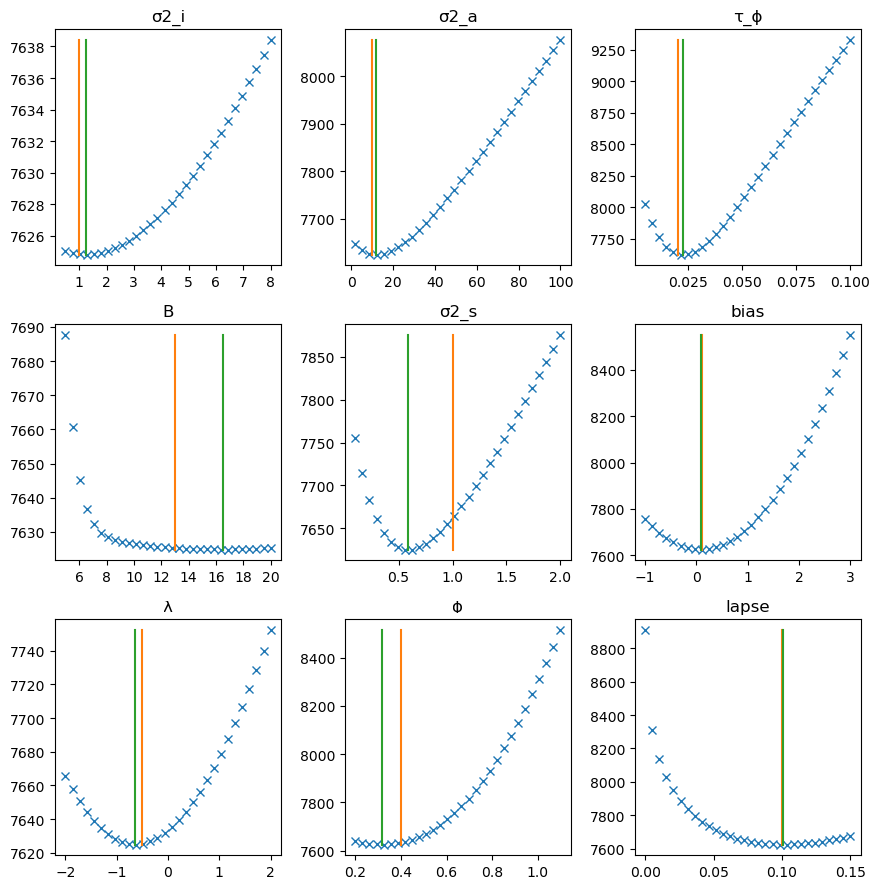

In [68]:
num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]

for i in 1:9
                  
    ax[i].plot(αs[i], LL_scan[i], "x")
    ax[i].set_title(name[i])
    ax[i].plot(x_syn[i]*ones(100), range(minimum(LL_scan[i]), stop=maximum(LL_scan[i]), length=100))
    ax[i].plot(x_mLL[i]*ones(100), range(minimum(LL_scan[i]), stop=maximum(LL_scan[i]), length=100))
    
    if i == 4
        ax[i].set_xticks(0:20:100)
    elseif i == 1
        ax[i].set_xticks(1:1:8)
    elseif i == 2
        ax[i].set_xticks(6:2:20)
    elseif i == 5
        ax[i].set_xticks(0.5:0.5:2)
    end
    
end

tight_layout() 

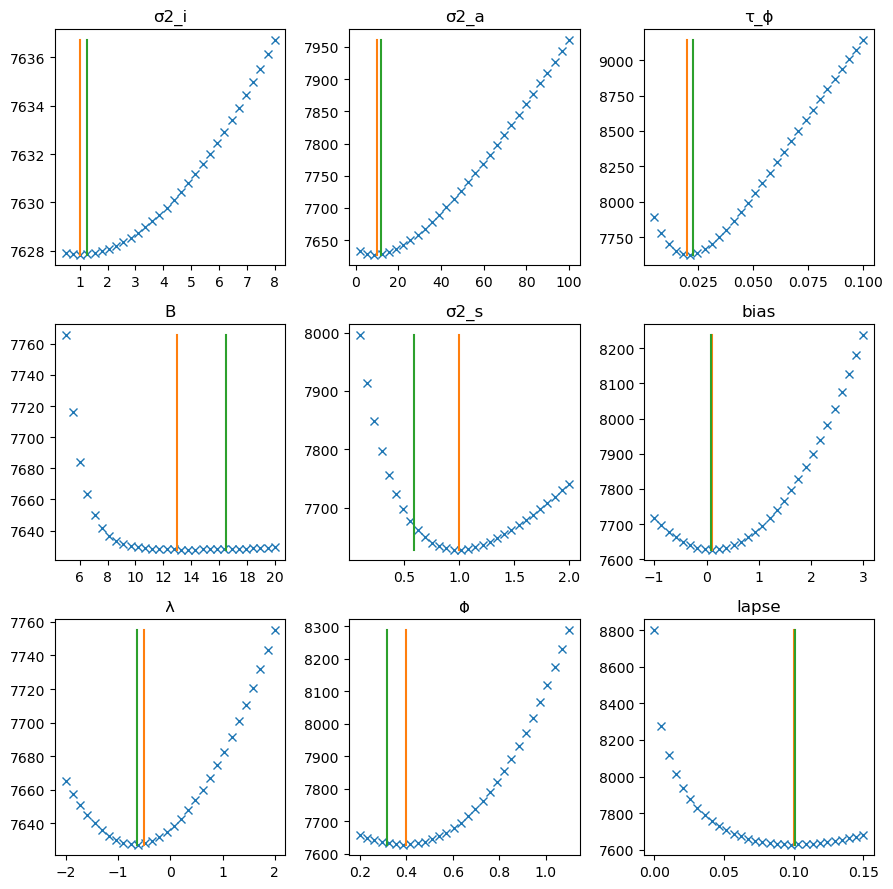

In [69]:
LL_scan = map(i-> map(x-> ℓℓ(vcat(x_syn[1:i-1], x, x_syn[i+1:end]), model), αs[i]), 1:9);

num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]

for i in 1:9
                  
    ax[i].plot(αs[i], LL_scan[i], "x")
    ax[i].set_title(name[i])
    ax[i].plot(x_syn[i]*ones(100), range(minimum(LL_scan[i]), stop=maximum(LL_scan[i]), length=100))
    ax[i].plot(x_mLL[i]*ones(100), range(minimum(LL_scan[i]), stop=maximum(LL_scan[i]), length=100))
    
    if i == 4
        ax[i].set_xticks(0:20:100)
    elseif i == 1
        ax[i].set_xticks(1:1:8)
    elseif i == 2
        ax[i].set_xticks(6:2:20)
    elseif i == 5
        ax[i].set_xticks(0.5:0.5:2)
    end
    
end

tight_layout() 

In [85]:
αs = collect(-2.:0.01:2.)
xs_scan = map(y-> x_mLL + y * eigvecs(H)[:,1], αs);

In [86]:
lb = options.lb
ub = options.ub;

In [87]:
LL_scan = map(y-> (!any((y .< lb) .| (y .> ub)) ? ℓℓ(y,model) : -Inf), xs_scan);

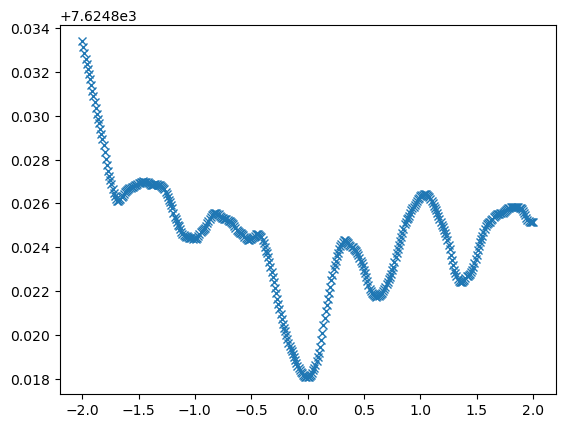

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f96bb4f2550>

In [88]:
finite_LL_scan = filter(isfinite, LL_scan);
finite_αs = αs[isfinite.(LL_scan)];
plot(αs, LL_scan, "x")

In [ ]:
αs = 20e0 *collect(-0.2:0.01:0.2)
xs_scan = map(y-> x_mLL + y * eigvecs(H)[:,1], αs)
LL_scan_2 = map(y-> (!any((y .< lb) .| (y .> ub)) ? ℓℓ(y,model) : -Inf), xs_scan);

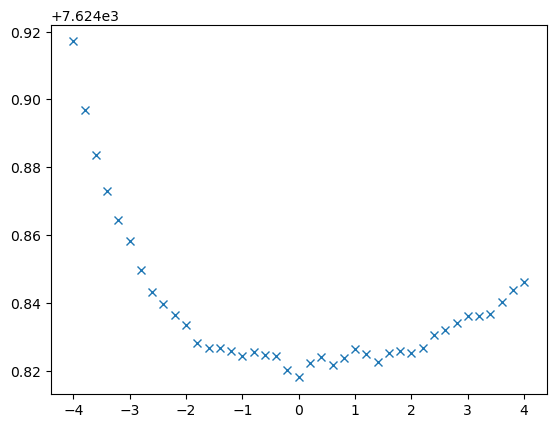

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f96ba9a45f8>

In [91]:
plot(αs, LL_scan_2, "x")